In [16]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import dataset
df = pd.read_csv("Restaurant_Reviews.tsv",delimiter = '\t',quoting = 3)
#quoting = 3 is to tell the compiler to ignore all the quotes symbol
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
df.dtypes

Review    object
Liked      int64
dtype: object

In [5]:
#cleaning the text
import re
import nltk
#download the nltk stopwords
#stopwords are those that are irrelevant to the context
nltk.download('stopwords')
#import stopwords
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gauth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [6]:
corpus = [] #consists of all the clean text
n = df.shape[0]
for i in range(n):
    review = df.iloc[i,0]
    #keeping only the letters and removing all the punctuations and numbers
    review = re.sub('[^a-zA-Z]',' ',review) #select only leters , replace all unwanted characters with ' '
    review = review.lower() #coverting all words to lowercase
    #splitting the words into a list
    review = review.split()
    #removing the irrelevent words and stemming the word
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [7]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'name',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place accid could happier',


In [8]:
#creating the bag of words model
#taking all the different words of the reviews and create one column for each word , row corresponding to each review
#each cell consists of the number of times the word was used in the review
#so this creates a matrix with a lot of 0's
#this is called a sparse matrix , and we need to reduce the sparsity

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
#create a sparse matrix
cv = CountVectorizer()   # you can add a parameter max_ffeature to select only the most frequent words
X = cv.fit_transform(corpus)
X=X.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
#dependent variable
Y = df.iloc[:,1].values
Y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [12]:
# now we can classify

In [13]:
#train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.20,random_state = 0)

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(xtrain,ytrain)

ypred = nb.predict(xtest)
ypred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1], dtype=int64)

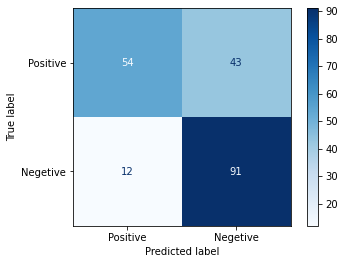

In [17]:
from sklearn.metrics import jaccard_similarity_score , confusion_matrix,plot_confusion_matrix

disp = plot_confusion_matrix(nb, xtest, ytest,
                                 display_labels=['Positive','Negetive'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)

In [18]:
jaccard_similarity_score(ytest,ypred)

d:\program files\python\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.725

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
parameters = [{'n_estimators':[300,500,700],'criterion':['gini','entropy']}]

In [41]:
from sklearn.model_selection import GridSearchCV as gsc

In [42]:
gs_rfc = gsc(estimator=rfc,param_grid=parameters,scoring='accuracy')

In [43]:
gs_rfc.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [44]:
gs_rfc.best_params_

{'criterion': 'entropy', 'n_estimators': 300}

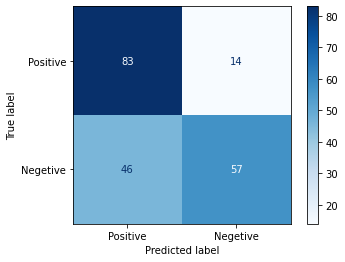

In [45]:
ypred = gs_rfc.predict(xtest)
disp = plot_confusion_matrix(gs_rfc, xtest, ytest,
                                 display_labels=['Positive','Negetive'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)

In [46]:
jaccard_similarity_score(ytest,ypred)

d:\program files\python\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7

In [47]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
parameters = [{'learning_rate':[0.0000001,0.00001],'booster':['gblinear'],'gamma':[0.1,0.01,0.001]}]

In [48]:
xgb_gs = gsc(estimator=xgb,param_grid = parameters,scoring = 'accuracy')
xgb_gs.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,

In [49]:
xgb_gs.best_params_

{'booster': 'gblinear', 'gamma': 0.1, 'learning_rate': 1e-05}

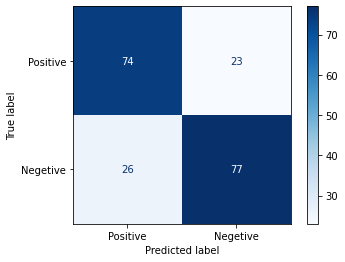

In [50]:
ypred = gs_rfc.predict(xtest)
disp = plot_confusion_matrix(xgb_gs, xtest, ytest,
                                 display_labels=['Positive','Negetive'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)

In [51]:
jaccard_similarity_score(ytest,ypred)

d:\program files\python\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
parameters = [{'n_neighbors':[3,4,5,6,7,8],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]

In [65]:
knn_gs = gsc(estimator=knn,param_grid = parameters,scoring = 'accuracy')
knn_gs.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [3, 4, 5, 6, 7, 8]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

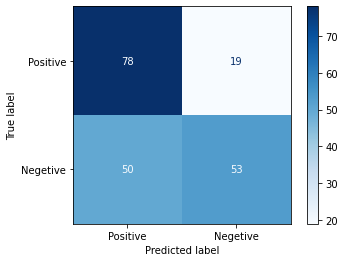

In [66]:
ypred = knn_gs.predict(xtest)
disp = plot_confusion_matrix(knn_gs, xtest, ytest,
                                 display_labels=['Positive','Negetive'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)

In [67]:
knn_gs.best_params_

{'algorithm': 'brute', 'n_neighbors': 3}

In [68]:
final_classifier = XGBClassifier(booster='gblinear',gamma= 0.1,learning_rate = 1e-05)

In [69]:
final_classifier.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=1e-05, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=0, scale_pos_weight=1, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)

In [87]:
def predict(review):
    corpus = []
    #keeping only the letters and removing all the punctuations and numbers
    review = re.sub('[^a-zA-Z]',' ',review) #select only leters , replace all unwanted characters with ' '
    review = review.lower() #coverting all words to lowercase
    #splitting the words into a list
    review = review.split()
    #removing the irrelevent words and stemming the word
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    
    X = cv.transform(corpus)
    ypred = final_classifier.predict(X)
    if(ypred == [1]):
        print("It's a positive review!   :)")
    else:
        print("It's a negetive review!   :(")

In [88]:
predict("the food was horrible , i will not reccomend this place to anyone")

It's a negetive review!   :(


In [89]:
predict("the food was delicious ... 5 stars for that . Service was not that great though . But overall good experience")

It's a positive review!   :)


In [90]:
predict("bla bla bla bla bla")

It's a positive review!   :)


In [91]:
predict("the food was pathetic")

It's a negetive review!   :(
